## Homework Exercise: Shruti Bajpai

1. Exercise 3 (p.198, Chap.5)
2. Exercise 8 (p.200, Chap.5)
3. Exercise 1 (p.259, Chap.6)
4. Exercise 9 (p.263, Chap.6)
5. Exercise 9 (p.299, Chap.7)
6. Exercise 10 (p.300, Chap.7)

### Q1) Chapter 5 Exercise 3

#### We now review k-fold cross-validation

##### (a) Explain how k-fold cross-validation is implemented.

K-folds simply divides the data into equal sets; it takes the first set as a validation set and then k - 1 (or all the other groups) are fitted on to obtain the Mean Square Error (MSE). This procedure is repeated k times, each time with a new validation set not previously tested, so that each set is compared to each other eventually and one can receive an estimated test error rate. Typically k = 10 is the average a dataset has been divided into; while useful and thorough, this does make it computationally expensive to compare each set to each other. 

##### (b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
###### i. The validation set approach?
The validation approach helps to estimate the errors for a test set with a specific set of observations by splitting the dataset into two parts - training and validation sets. The training model is fitted and then used to fit the validation test set, which results in certain observations not meeting the threshold and serving as outliers as a result of not fitting within the required parameters. This creates a mean-square error and allows to see the test error rates; simple enough to execute, but the test error rate can drastically change depending on which variables were taken into account for the training and validation sets. Additionally, the training set is not an indicator of the entire dataset; only a subset of the observations are included in the training rather than the validation, which means that the training may overestimate the test error rate. 

###### ii. LOOCV?
This approach is quite similar to the validation approach, but in hopes of reducing overestimation on the test error rates. Similar to the validation approach, the LOOCV does split training and test, but only uses one observation for training and the rest are created as part of the observations for test. In essence, if there are x number of observations, it takes out x - 1 observations and creates this as the train to compare against the validation set. This is repeated several times to provide overall effectiveness and compare on a 1 on 1 level. The main idea to note though is that the total possible combinations must be the same as the original number of data points in the sample (or x). Again though, this process is quite a lengthy one and can take time

### Q2) Chapter 5 Exercise 8

#### We will now perform cross-validation on a simulated data set

##### (a) Generate a simulated data set as follows: In this data set, what is n and what is p? Write out the model used to generate the data in equation form

In [2]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

n = 100, p = 2

Y = X − 2X^2 + ϵ

##### (b) Create a scatterplot of X against Y . Comment on what you find

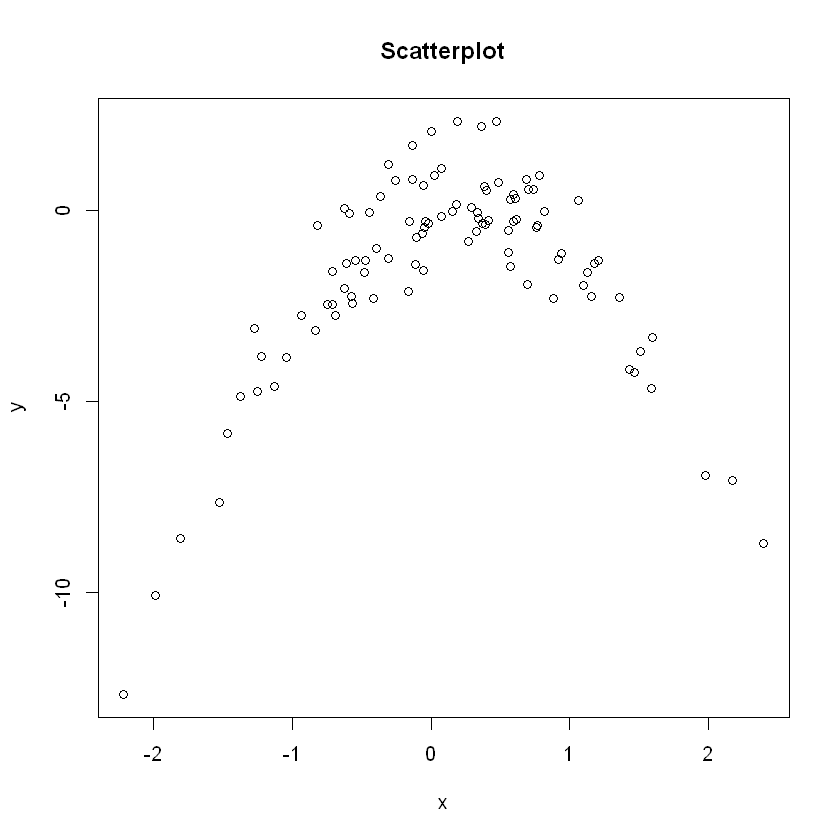

In [9]:
plot(x, y, main="Scatterplot")

###### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
###### i. Y = β0 + β1X + ϵ 

In [20]:
library(boot)
Data = data.frame(x, y)
set.seed(1)
glm.fit=glm(y ∼ x)
cv.glm(Data, glm.fit)$delta

[1] 7.288162 7.284744

###### ii. Y = β0 + β1X + β2X2 + ϵ

In [21]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 0.9374236 0.9371789

###### iii. Y = β0 + β1X + β2X2 + β3X3 + ϵ

In [22]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 0.9566218 0.9562538

###### iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ

In [23]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 0.9539049 0.9534453

##### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

Results didn't change since the evaluation was for n folds of a single observation and that didn't change.

In [28]:
Data2 = data.frame(x, y)
set.seed(100)
# i.
glm.fit = glm(y ~ x)
cv.glm(Data2, glm.fit)$delta

#ii.
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data2, glm.fit)$delta

#iii.
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data2, glm.fit)$delta

#iv. 
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data2, glm.fit)$delta

[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

[1] 0.9566218 0.9562538

[1] 0.9539049 0.9534453

##### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer

The model with a polynomial (Y = β0 + β1X + β2X2 + β3X3 + ϵ) has the smallest LOOCV error. I am not sure exactly why this is because I would've expected the quadratic equation to have the lowest error due to the way it reflects Y.

##### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

These are similar to the last two results of the polynomial (β3X3) results and β4X4 (quandratic equation) and do show a statistical significance for p < 0.05

In [29]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


### Q3) Chapter 6 Exercise 1

#### 1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2,...,p predictors. Explain your answers:

##### (a) Which of the three models with k predictors has the smallest training RSS?

I believe that best subset selection will have the smallest training RSS given forward stepwise and backward stepwise have dependencies for their predictors where the first variable is picked and iterated to the k'th model.

#### (b) Which of the three models with k predictors has the smallest test RSS?

Forward and backward stepwise have better RSS than best subset selection given their focus is on the training set.

#### (c) True or False:
##### i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

i. True

##### ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by backward stepwise selection.

ii. True


##### iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

iii. False


##### iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.


iv. False


##### v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.


v. False

### Q3) Chapter 6 Exercise 9

#### In this exercise, we will predict the number of applications received using the other variables in the College data set.

##### a) Split the data set into a training set and a test set.

In [40]:
library(ISLR) #library to use college dataset
set.seed(11) #generating random sequence

train.size = dim(College)[1] / 2
#train.size

train = sample(1:dim(College)[1], train.size)
#train

test = -train
#test

College.train = College[train, ]
College.train 

College.test = College[test, ]
College.test


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
William Jewell College,Yes,663,547,315,32,67,1279,75,10060,2970,500,2600,74,80,11.2,19,7885,59
Baker University,Yes,602,483,206,21,47,958,466,8620,4100,400,2250,58,68,11.0,21,6136,65
University of West Florida,No,1558,1254,472,20,57,3754,2477,6172,3994,541,1387,83,87,23.4,12,8488,53
Columbia College,Yes,737,614,242,21,67,968,237,10425,3975,500,1500,61,77,14.7,34,8693,76
Christopher Newport University,No,883,766,428,3,37,2910,1749,7860,4750,525,1889,80,82,21.2,16,4639,48
St. Martin's College,Yes,191,165,63,5,25,494,574,11550,4270,300,500,43,77,14.5,8,9209,40
SUNY College at Plattsburgh,No,5549,3583,853,9,40,5004,475,6550,4176,600,1380,80,90,17.9,16,6174,65
Milwaukee School of Engineering,Yes,1217,1088,496,36,69,1773,884,11505,3255,1000,2075,35,46,16.7,23,7140,67
Fresno Pacific College,Yes,346,274,146,51,87,704,63,9900,3670,630,1818,59,59,10.5,14,8095,54
Furman University,Yes,2161,1951,685,56,82,2371,175,13440,4048,600,1250,92,95,13.5,28,12940,82


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Allentown Coll. of St. Francis de Sales,Yes,1179,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74
Alma College,Yes,1267,1080,385,44,73,1306,28,12572,4552,400,400,79,87,15.3,32,9305,68
Angelo State University,No,3540,2001,1016,24,54,4190,1512,5130,3592,500,2000,60,62,23.1,5,4010,34
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70


##### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [41]:
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)
mean((College.test[, "Apps"] - lm.pred)^2)

#Test RSS = 1026095

[1] 1026096

##### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [47]:
install.packages('glmnet')
library('glmnet')
train.mat = model.matrix(Apps~., data=College.train)
test.mat = model.matrix(Apps~., data=College.test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, College.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best

ridge.pred = predict(mod.ridge, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - ridge.pred)^2)

#Test error = 1026068

package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bajpa\AppData\Local\Temp\RtmpI92zti\downloaded_packages


Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


[1] 0.01

[1] 1026069

##### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [49]:
mod.lasso = cv.glmnet(train.mat, College.train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

lasso.pred = predict(mod.lasso, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - lasso.pred)^2)

mod.lasso = glmnet(model.matrix(Apps~., data=College), College[, "Apps"], alpha=1)
predict(mod.lasso, s=lambda.best, type="coefficients")

#Test error = 1026035, slightly lower than ridge regression.

[1] 0.01

[1] 1026036

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -471.39372069
(Intercept)    .         
PrivateYes  -491.04485135
Accept         1.57033288
Enroll        -0.75961467
Top10perc     48.14698891
Top25perc    -12.84690694
F.Undergrad    0.04149116
P.Undergrad    0.04438973
Outstate      -0.08328388
Room.Board     0.14943472
Books          0.01532293
Personal       0.02909954
PhD           -8.39597537
Terminal      -3.26800340
S.F.Ratio     14.59298267
perc.alumni   -0.04404771
Expend         0.07712632
Grad.Rate      8.28950241

##### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

Warning message:
"package 'pls' is in use and will not be installed"Warning message in mean.default((College.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"

[1] NA

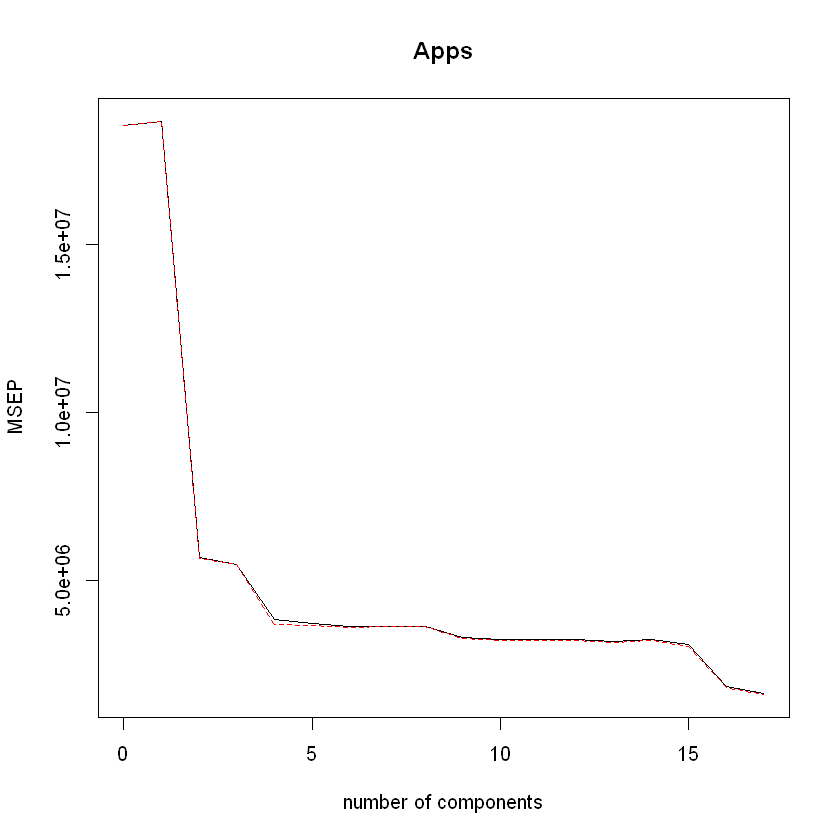

In [53]:
install.packages('pls')
library(pls)

pcr.fit = pcr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

pcr.pred = predict(pcr.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pcr.pred))^2)

##### f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

integer(0)

Warning message in mean.default((College.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"

[1] NA

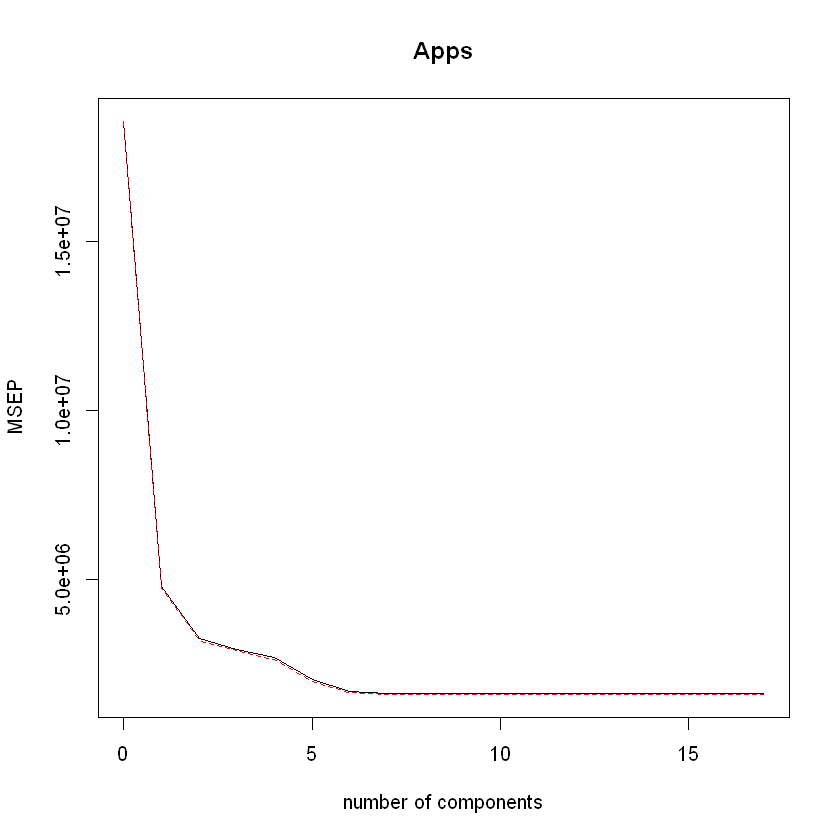

In [59]:
pls.fit = plsr(Apps~., data=College.train, scale=T, validation="CV")
as.integer(validationplot(pls.fit, val.type="MSEP"))

pls.pred = (as.integer(predict(pls.fit, College.test, ncomp=10)))
mean((College.test[, "Apps"] - data.frame(pls.pred))^2)

##### g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

For some reason, the only values shown previously were not all listed, but OLS, ridge, and lasso were similar in test error results, so not much difference and they can be skewed if the values aren't the same.

Warning message in mean.default((College.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"Warning message in mean.default((College.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"

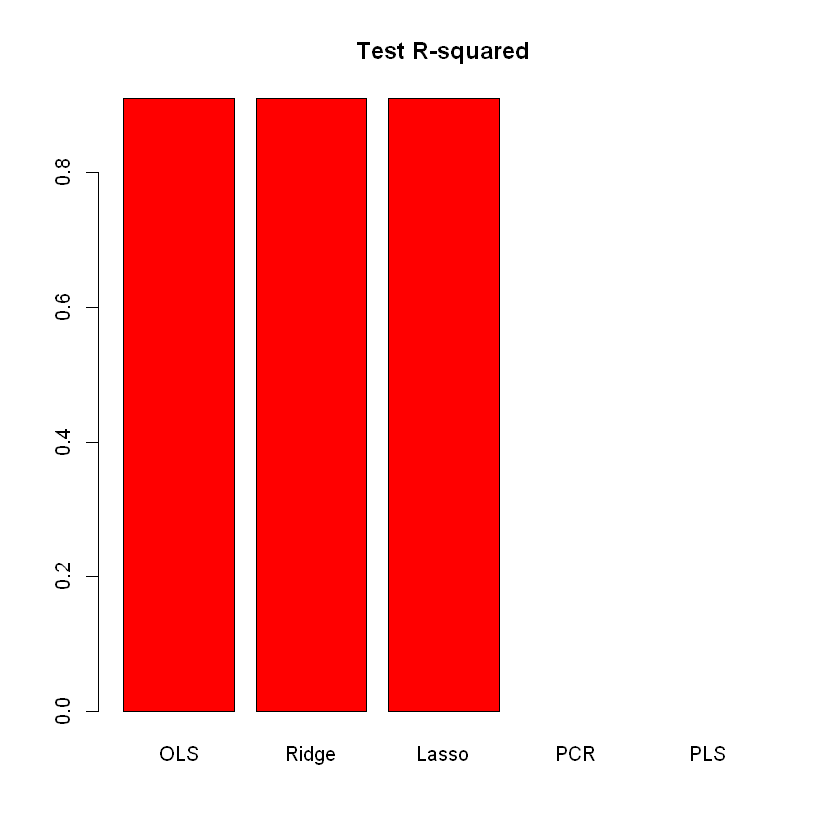

In [61]:
test.avg = mean(College.test[, "Apps"])
lm.test.r2 = 1 - mean((College.test[, "Apps"] - lm.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
ridge.test.r2 = 1 - mean((College.test[, "Apps"] - ridge.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
lasso.test.r2 = 1 - mean((College.test[, "Apps"] - lasso.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
pcr.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pcr.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
pls.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pls.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
barplot(c(lm.test.r2, ridge.test.r2, lasso.test.r2, pcr.test.r2, pls.test.r2), col="red", names.arg=c("OLS", "Ridge", "Lasso", "PCR", "PLS"), main="Test R-squared")

### Q1) Chapter 7 Exercise 9

#### This question uses the variables --dis-- (the weighted mean of distances to five Boston employment centers) and --nox-- (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat --dis-- as the predictor and nox as the response.

##### (a) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

Curve fits pretty well and summary shows all polynomials as significant

Warning message:
"package 'MASS' was built under R version 3.6.3"


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


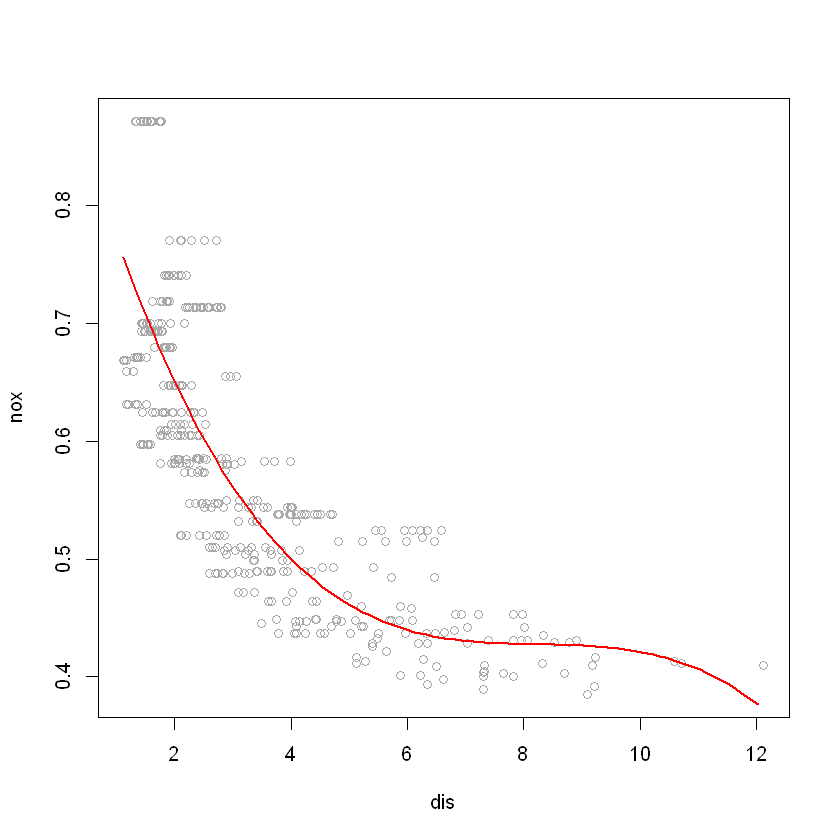

In [62]:
set.seed(1)
library(MASS)
attach(Boston)

lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)

dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, col = "red", lwd = 2)

##### (b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

All the training values decrease with the given different polynomial degrees

In [65]:
all.rss = rep(NA, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(lm.fit$residuals^2)
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

##### (c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results

CV has an inverse relationship with degree, especially with degrees 1 through 3; CV goes down as degrees increase and stay constant until 5, but then start increasing for the most part until 10.

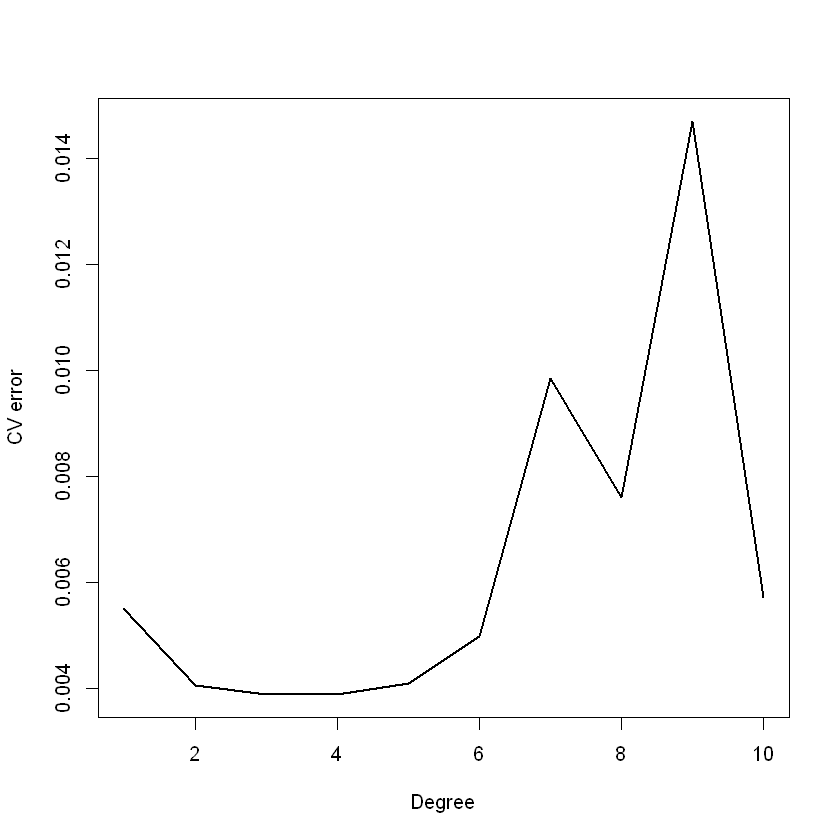

In [69]:
library(boot)
all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l", pch = 20, 
    lwd = 2)

##### (d) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit

The knots were chosen based on the fact that the --dis-- variable went highest to 13; so the degrees of freedom were divided into 4, with it making sense to have intervals at 4, 7, 11 to account for the upper threshold (13)


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 4, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 4, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

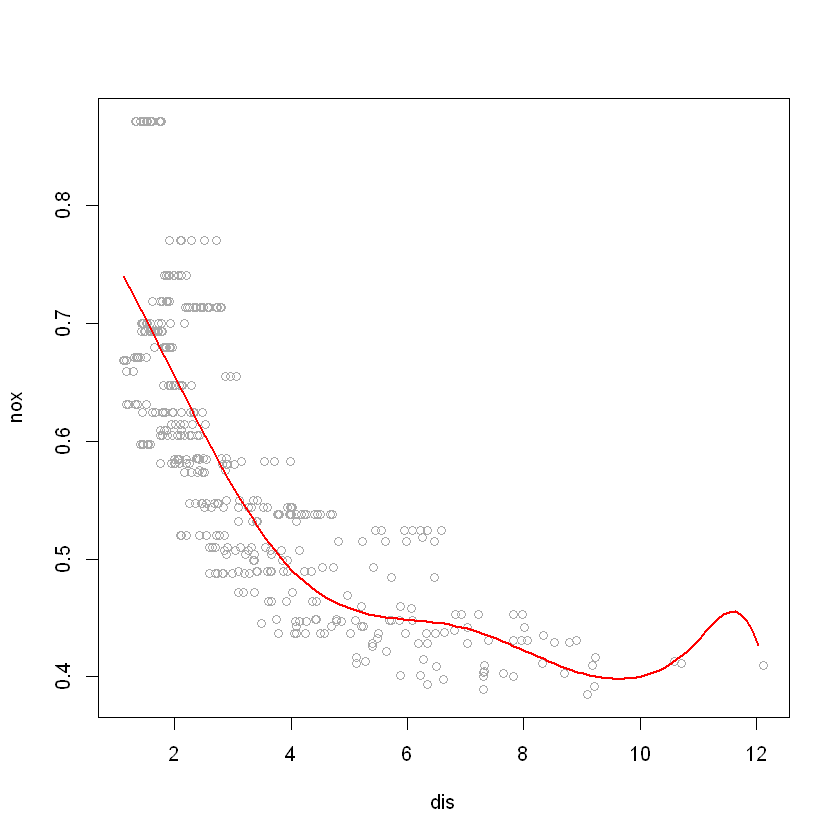

In [71]:
library(splines)
sp.fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)

sp.pred = predict(sp.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, sp.pred, col = "red", lwd = 2)

##### e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

Train RSS decreases until degrees of freedom equals 14, but then ever so slightly increases at df = 15 and is slightly higher at df = 16.

In [74]:
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = lm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = sum(lm.fit$residuals^2)
}
all.cv[-c(1, 2)]

[1] 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535
 [9] 1.796992 1.788999 1.782350 1.781838 1.782798 1.783546

##### (f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

In [79]:
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = glm(nox ~ bs(dis), data = Boston)
    all.cv[i] = cv.glm(Boston, lm.fit, K = 10)$delta[2]
}

plot(3:16 all.cv[-c(1, 2)] lwd = 2, type = "l", xlab = "df", ylab = "CV error")

ERROR: Error in parse(text = x, srcfile = src): <text>:7:11: unexpected symbol
6: 
7: plot(3:16 all.cv
             ^


### Q1) Chapter 7 Exercise 10

#### College Dataset

##### (a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bajpa\AppData\Local\Temp\RtmpI92zti\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.6.3"

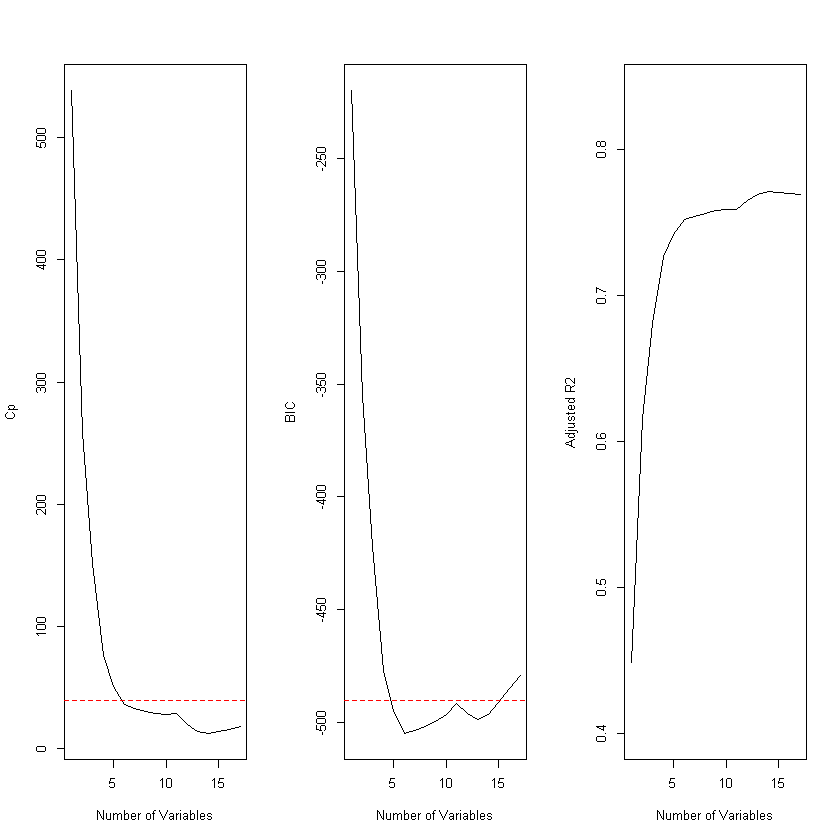

In [83]:
set.seed(1)
install.packages('leaps')
library(ISLR)
library(leaps)
attach(College)
train = sample(length(Outstate), length(Outstate)/2)
test = -train
College.train = College[train, ]
College.test = College[test, ]
reg.fit = regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")
reg.summary = summary(reg.fit)
par(mfrow = c(1, 3))
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
min.cp = min(reg.summary$cp)
std.cp = sd(reg.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
min.bic = min(reg.summary$bic)
std.bic = sd(reg.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R2", 
    type = "l", ylim = c(0.4, 0.84))

##### b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.


  There is a binary version available but the source version is later:
    binary source needs_compilation
gam 1.16.1   1.20              TRUE

  Binaries will be installed


Warning message:
"package 'gam' is in use and will not be installed"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

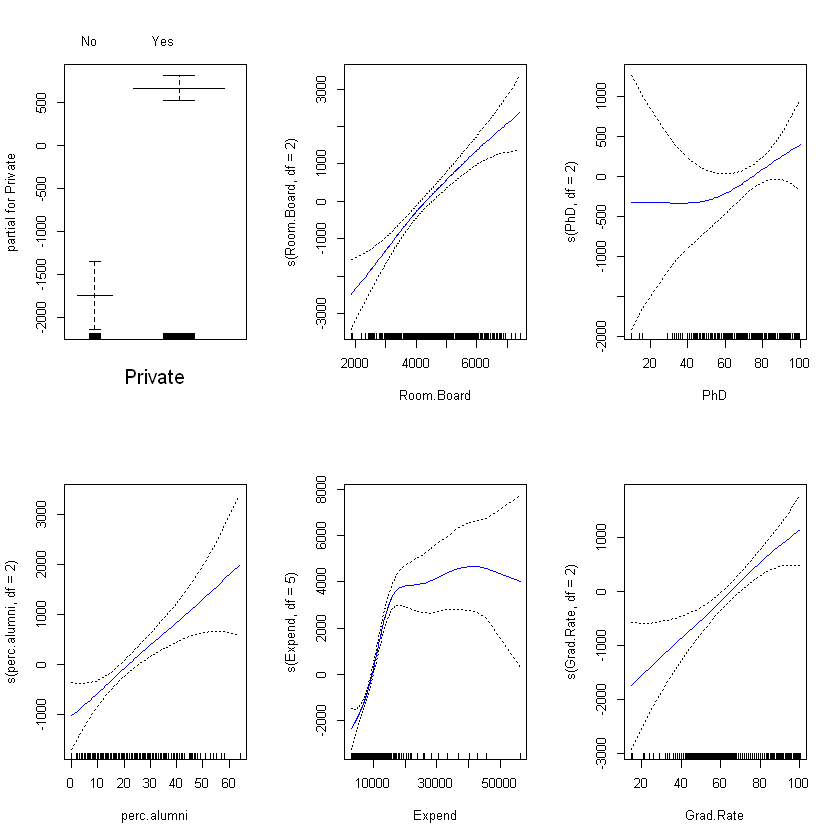

In [93]:
install.packages('gam')
library(gam)

gam.fit = gam(Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, df = 2) + 
    s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, df = 2), data = College.train)
par(mfrow = c(2, 3))
plot(gam.fit, se = T, col = "blue")

##### (c) Evaluate the model obtained on the test set, and explain the results obtained.

In [ ]:
gam.pred = predict(gam.fit, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err

gam.tss = mean((College.test$Outstate - mean(College.test$Outstate))^2)
test.rss = 1 - gam.err/gam.tss
test.rss



##### (d) For which variables, if any, is there evidence of a non-linear relationship with the response?

In [95]:
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, 
    df = 2) + s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, 
    df = 2), data = College.train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7402.89 -1114.45   -12.67  1282.69  7470.60 

(Dispersion Parameter for gaussian family taken to be 3711182)

    Null Deviance: 6989966760 on 387 degrees of freedom
Residual Deviance: 1384271126 on 373 degrees of freedom
AIC: 6987.021 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private                  1 1778718277 1778718277 479.286 < 2.2e-16 ***
s(Room.Board, df = 2)    1 1577115244 1577115244 424.963 < 2.2e-16 ***
s(PhD, df = 2)           1  322431195  322431195  86.881 < 2.2e-16 ***
s(perc.alumni, df = 2)   1  336869281  336869281  90.771 < 2.2e-16 ***
s(Expend, df = 5)        1  530538753  530538753 142.957 < 2.2e-16 ***
s(Grad.Rate, df = 